In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np

In [71]:
# Example Data

data_with_weather = [{'average_rain': 1.2680360073606207, 'average_temp': 14.757253687782645, 'lga_code': 21750, 'suburb_name': 'Colac Otway', 'total_a_offences': 325, 'total_d_offences': 95, 'total_offences': 1325}, {'average_rain': 1.4516666666666669, 'average_temp': 15.080833252271017, 'lga_code': 22250, 'suburb_name': 'Gannawarra', 'total_a_offences': 121, 'total_d_offences': 56, 'total_offences': 585}, {'average_rain': 0.046933333333333334, 'average_temp': 13.17573335874122, 'lga_code': 23350, 'suburb_name': 'Indigo', 'total_a_offences': 79, 'total_d_offences': 27, 'total_offences': 371}, {'average_rain': 0.07932852788931354, 'average_temp': 11.671680142932427, 'lga_code': 26260, 'suburb_name': 'Southern Grampians', 'total_a_offences': 223, 'total_d_offences': 111, 'total_offences': 1116}, {'average_rain': 1.018282425852147, 'average_temp': 11.515579339616485, 'lga_code': 27450, 'suburb_name': 'Yarra Ranges', 'total_a_offences': 976, 'total_d_offences': 273, 'total_offences': 5781}, {'average_rain': 0.6289902998236332, 'average_temp': 12.842333535458465, 'lga_code': 23670, 'suburb_name': 'Knox', 'total_a_offences': 1215, 'total_d_offences': 427, 'total_offences': 8103}, {'average_rain': 0.9355343001131339, 'average_temp': 13.296060878382315, 'lga_code': 23430, 'suburb_name': 'Kingston', 'total_a_offences': 1187, 'total_d_offences': 494, 'total_offences': 8646}, {'average_rain': 1.5237333333333332, 'average_temp': 14.24524448120594, 'lga_code': 24900, 'suburb_name': 'Moira', 'total_a_offences': 304, 'total_d_offences': 76, 'total_offences': 1685}, {'average_rain': 3.5360509989741584, 'average_temp': 13.164623122089255, 'lga_code': 26430, 'suburb_name': 'Strathbogie', 'total_a_offences': 129, 'total_d_offences': 13, 'total_offences': 446}, {'average_rain': 0.3152549889135255, 'average_temp': 14.46519243848091, 'lga_code': 20740, 'suburb_name': 'Bass Coast', 'total_a_offences': 374, 'total_d_offences': 118, 'total_offences': 1784}, {'average_rain': 1.1818181818181819, 'average_temp': 9.957575913631555, 'lga_code': 21670, 'suburb_name': 'Central Goldfields', 'total_a_offences': 234, 'total_d_offences': 64, 'total_offences': 918}, {'average_rain': 1.4754925835731678, 'average_temp': 4.9895948589850985, 'lga_code': 20110, 'suburb_name': 'Alpine', 'total_a_offences': 114, 'total_d_offences': 47, 'total_offences': 399}, {'average_rain': 2.1530313124583613, 'average_temp': 13.603991812450367, 'lga_code': 21370, 'suburb_name': 'Campaspe', 'total_a_offences': 458, 'total_d_offences': 142, 'total_offences': 2924}, {'average_rain': 0.1825719474713607, 'average_temp': 13.109726880354634, 'lga_code': 25490, 'suburb_name': 'Moyne', 'total_a_offences': 135, 'total_d_offences': 30, 'total_offences': 460}, {'average_rain': 0.426080733653158, 'average_temp': 9.377258860638994, 'lga_code': 26700, 'suburb_name': 'Wangaratta', 'total_a_offences': 360, 'total_d_offences': 166, 'total_offences': 1644}, {'average_rain': 0.000439185067707698, 'average_temp': 12.368451870121008, 'lga_code': 23190, 'suburb_name': 'Horsham', 'total_a_offences': 371, 'total_d_offences': 130, 'total_offences': 1442}, {'average_rain': 0.08979479863930648, 'average_temp': 12.854175341844847, 'lga_code': 25810, 'suburb_name': 'Northern Grampians', 'total_a_offences': 213, 'total_d_offences': 46, 'total_offences': 768}, {'average_rain': 0.39309930008748906, 'average_temp': 12.77788168814421, 'lga_code': 21270, 'suburb_name': 'Buloke', 'total_a_offences': 40, 'total_d_offences': 13, 'total_offences': 216}, {'average_rain': 0.16109848484848482, 'average_temp': 12.77410984709859, 'lga_code': 26730, 'suburb_name': 'Warrnambool', 'total_a_offences': 619, 'total_d_offences': 231, 'total_offences': 3017}, {'average_rain': 0.008300524934383203, 'average_temp': 12.693482016249904, 'lga_code': 26890, 'suburb_name': 'West Wimmera', 'total_a_offences': 32, 'total_d_offences': 7, 'total_offences': 125}, {'average_rain': 0.7370888888888889, 'average_temp': 13.952822224881913, 'lga_code': 26490, 'suburb_name': 'Surf Coast', 'total_a_offences': 181, 'total_d_offences': 57, 'total_offences': 892}, {'average_rain': 1.171328946076024, 'average_temp': 13.117665256689087, 'lga_code': 23110, 'suburb_name': 'Hobsons Bay', 'total_a_offences': 837, 'total_d_offences': 342, 'total_offences': 4852}, {'average_rain': 1.4403395617945556, 'average_temp': 12.992506885103422, 'lga_code': 23270, 'suburb_name': 'Hume', 'total_a_offences': 2636, 'total_d_offences': 681, 'total_offences': 15661}, {'average_rain': 1.493353398545272, 'average_temp': 13.27538967222267, 'lga_code': 22830, 'suburb_name': 'Greater Shepparton', 'total_a_offences': 1090, 'total_d_offences': 504, 'total_offences': 6241}, {'average_rain': 0.12893979637007524, 'average_temp': 12.298107562282409, 'lga_code': 22410, 'suburb_name': 'Glenelg', 'total_a_offences': 181, 'total_d_offences': 75, 'total_offences': 963}, {'average_rain': 0.6424807056229328, 'average_temp': 5.657844546709986, 'lga_code': 24250, 'suburb_name': 'Mansfield', 'total_a_offences': 63, 'total_d_offences': 44, 'total_offences': 326}]
top_5_by_total_offences = sorted(data_with_weather, key=lambda x: x['total_offences'], reverse=True)[:10]
bottom_5_by_total_offences = sorted(data_with_weather, key=lambda x: x['total_offences'])[:10]

top_5_by_total_a_offences = sorted(data_with_weather, key=lambda x: x['total_a_offences'], reverse=True)[:10]
bottom_5_by_total_a_offences = sorted(data_with_weather, key=lambda x: x['total_a_offences'])[:10]

top_5_by_total_d_offences = sorted(data_with_weather, key=lambda x: x['total_d_offences'], reverse=True)[:10]
bottom_5_by_total_d_offences = sorted(data_with_weather, key=lambda x: x['total_d_offences'])[:10]

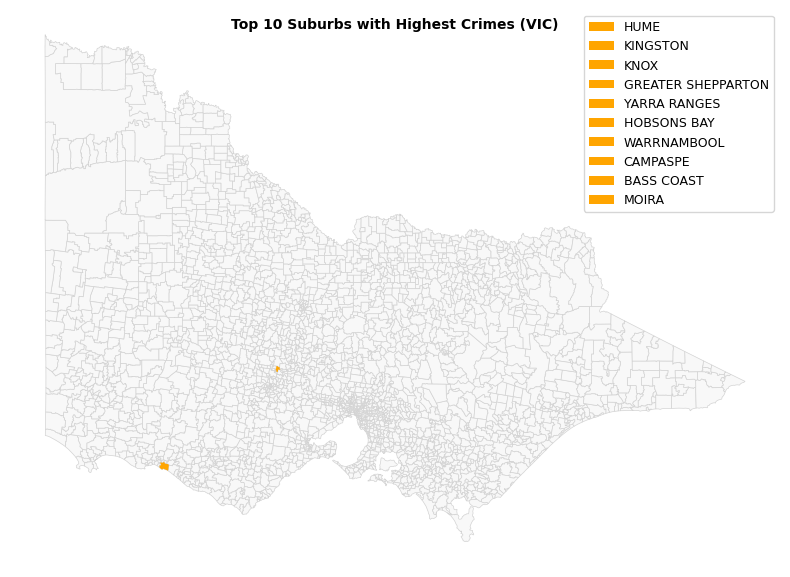

In [107]:
map_titles = {
    'crime':'Top 10 Suburbs with Highest Crimes (VIC)',
    'temp':'Top 10 Suburbs with Highest Annual Temperature (VIC)',
    'precip':'Top 10 Suburbs with Highest Annual Precipitation (VIC)'
}

gdf = gpd.read_file("../data/suburb-2-vic.geojson")

def plot_map(map_type,highlight_suburbs):
    map_title = map_titles[map_type]

    # Plot all suburbs
    gdf.plot(color='#F8F8F8',edgecolor='lightgrey',linewidth=0.5,figsize=(8, 8))

    # Plot highlighted suburbs
    highlight_color = 'orange'
    highlighted_gdf = gdf[gdf['vic_loca_2'].isin(highlight_suburbs)]
    highlighted_gdf.plot(color=highlight_color, ax=plt.gca())
    # Create legend for highlighted suburbs
    legend_elements = [Patch(facecolor=highlight_color, label=suburb) for suburb in highlight_suburbs]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

    # Plot with title
    plt.axis('off')
    plt.suptitle(map_title, y=0.82, fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return None

all_suburbs = [entry['suburb_name'].upper() for entry in top_5_by_total_offences]
plot_map('crime',all_suburbs)

# top_suburbs = [entry['suburb_name'].upper() for entry in top_5_by_total_offences]
# bottom_suburbs = [entry['suburb_name'].upper() for entry in bottom_5_by_total_offences]
# plot_map('crime',top_suburbs)
# plot_map('crime',bottom_suburbs)

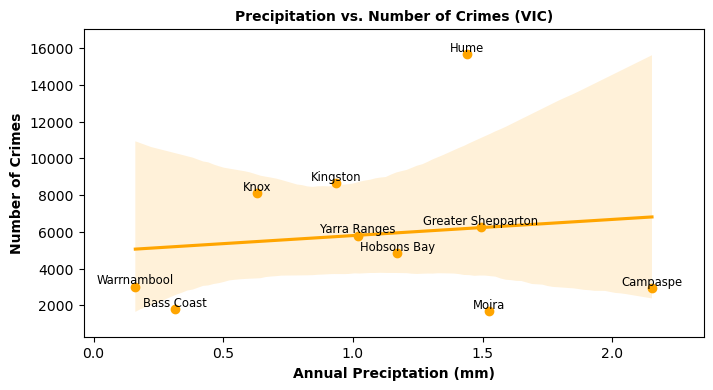

In [106]:
scatter_annotations = {
    'title': {
        'average_temp':'Temperature vs. Number of Crimes (VIC)',
        'average_rain':'Precipitation vs. Number of Crimes (VIC)'
    },
    'xlabel': {
        'average_temp':'Annual Temperature (°C)',
        'average_rain':'Annual Preciptation (mm)'
    }
}

def plot_scatter_chart(scatter_type,data):
    # Extracting data
    feature_data = [entry[scatter_type] for entry in data]
    count_data = [entry['total_offences'] for entry in data]
    suburbs = [entry['suburb_name'] for entry in data]

    # Create Scatter Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(feature_data, count_data, color='orange')

    # # Add Trend Line
    sns.regplot(x=feature_data, y=count_data, scatter=False, color='orange')

    # Add annotations for each suburb
    for i, suburb in enumerate(suburbs):
        plt.text(feature_data[i], count_data[i], suburb, ha='center', va='bottom', size='small')

    # Plot with title, xlabel, and ylabel
    plt.title(scatter_annotations['title'][scatter_type], fontweight='bold', fontsize=10)
    plt.xlabel(scatter_annotations['xlabel'][scatter_type], fontweight='bold')
    plt.ylabel('Number of Crimes', fontweight='bold')

    # Dynamically adjust limits
    x_range = max(feature_data) - min(feature_data)
    y_range = max(count_data) - min(count_data)
    x_padding = 0.1 * x_range
    y_padding = 0.1 * y_range

    plt.xlim(min(feature_data) - x_padding, max(feature_data) + x_padding)
    plt.ylim(min(count_data) - y_padding, max(count_data) + y_padding)
    plt.show()

# Example DataFrame with suburbs, temperature, and crime rate
plot_scatter_chart('average_rain',top_5_by_total_offences)

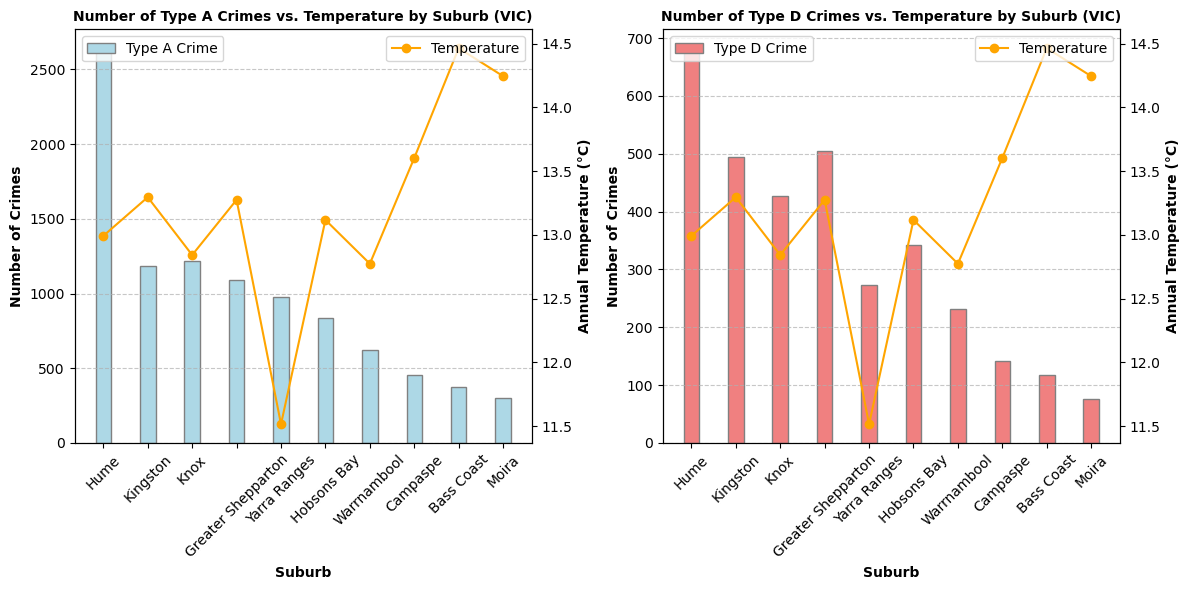

In [108]:
bar_annotations = {
    'title': {
        'average_temp':'vs. Temperature by Suburb (VIC)',
        'average_rain':'vs. Precipitation by Suburb (VIC)'
    },
    'ylabel': {
        'average_temp':'Annual Temperature (°C)',
        'average_rain':'Annual Preciptation (mm)'
    },
    'plotlabel': {
        'average_temp':'Temperature',
        'average_rain':'Preciptation'
    }
}

def plot_bar_chart(bar_type, data):
    # Extracting data
    suburbs = [entry['suburb_name'] for entry in data]
    total_a_offences = [entry['total_a_offences'] for entry in data]
    total_d_offences = [entry['total_d_offences'] for entry in data]
    feature_data = [entry[bar_type] for entry in data] # temperature or rain

    # Set up the data for plotting
    x = np.arange(len(suburbs))
    bar_width = 0.35
    
    # Increase the figure width
    plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

    # Adjusting the position of x for Type D Crime


    # Subplot for Type A Crime
    plt.subplot(1, 2, 1)
    plt.bar(x, total_a_offences, bar_width, label='Type A Crime', color='#ADD8E6', edgecolor='grey')
    plt.xlabel('Suburb',fontweight='bold')
    plt.ylabel('Number of Crimes',fontweight='bold')
    plt.title('Number of Type A Crimes {}'.format(bar_annotations['title'][bar_type]), fontsize=10, fontweight='bold')
    plt.xticks(x, suburbs, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')

    # Temperature line plot for Type A Crime
    ax2 = plt.gca().twinx()
    ax2.plot(x, feature_data, color='orange', marker='o', label=bar_annotations['plotlabel'][bar_type])
    ax2.set_ylabel(bar_annotations['ylabel'][bar_type],fontweight='bold')
    ax2.legend(loc='upper right')

    # Subplot for Type D Crime
    plt.subplot(1, 2, 2)
    plt.bar(x, total_d_offences, bar_width, label='Type D Crime', color='#F08080', edgecolor='grey')
    plt.xlabel('Suburb',fontweight='bold')
    plt.ylabel('Number of Crimes',fontweight='bold')
    plt.title('Number of Type D Crimes {}'.format(bar_annotations['title'][bar_type]), fontsize=10, fontweight='bold')
    plt.xticks(x, suburbs, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')

    # Temperature line plot for Type D Crime
    ax2 = plt.gca().twinx()
    ax2.plot(x, feature_data, color='orange', marker='o', label=bar_annotations['plotlabel'][bar_type])
    ax2.set_ylabel(bar_annotations['ylabel'][bar_type],fontweight='bold')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_bar_chart('average_temp',top_5_by_total_offences)

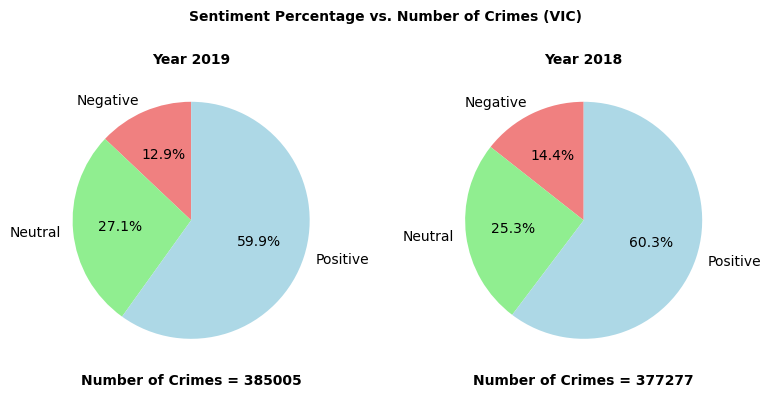

In [9]:
sentiments = ['Negative','Neutral','Positive']
colors = ['#F08080','#90EE90','#ADD8E6']

def plot_pie_chart(data):
    plt.figure(figsize=(8, 4))
    for i, year_data in enumerate(data):
        plt.subplot(1, len(data), i + 1)
        plt.pie(year_data['sentiment_counts'].values(),labels=sentiments,autopct='%1.1f%%',startangle=90, colors=colors)
        plt.gca().set_aspect('equal')
        plt.title(f"Year {year_data['year']}",fontweight='semibold',fontsize=10)
        plt.xlabel(f"Number of Crimes = {year_data['total_crimes']}",fontweight='semibold',fontsize=10)

    plt.suptitle('Sentiment Percentage vs. Number of Crimes (VIC)', fontweight='bold', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

data = [
    {'sentiment_counts': {'negative': 2778, 'neutral': 5824, 'positive': 12852}, 'total_crimes': 385005, 'year': 2019},
    {'sentiment_counts': {'negative': 3012, 'neutral': 5303, 'positive': 12631}, 'total_crimes': 377277, 'year': 2018}
]
plot_pie_chart(data)